In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Problem Statement
In this article, we will work with the advertising data of a marketing agency to develop a machine learning algorithm that predicts if a particular user will click on an advertisement. The data consists of 10 variables: 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', Timestamp' and 'Clicked on Ad'.

The main variable we are interested in is 'Clicked on Ad'. This variable can have two possible outcomes: 0 and 1 where 0 refers to the case where a user didn't click the advertisement, while 1 refers to the scenario where a user clicks the advertisement.

We will see if we can use the other 9 variables to accurately predict the value 'Clicked on Ad' variable. We will also perform some exploratory data analysis to see how 'Daily Time Spent on Site' in combination with 'Ad Topic Line' affects the user's decision to click on the add.

In [2]:
# Import data
data = pd.read_csv('../input/advertising.csv')

In [3]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
data.shape

(1000, 10)

#### Based on the first lines in the table, we can get a basic insight into the data we are working with. We want to check how much data do we have within each variable.****

In [5]:
# Checking the info on our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


#### Good news! All variables are complete and there are no missing values within them. Each of them contains 1000 elements and there will be no need for additional preprocessing of raw data.

#### We will also use the describe function to gain insight into the ranges in which variables change:

In [6]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


#### An interesting fact from the table is that the smallest area income is $13,996.50 and the highest is $79,484.80. This means that site visitors are people belonging to different social classes. It can also be concluded that we are analyzing a popular website since users spend between 32 and 91 minutes on the website in one session. These are really big numbers!

#### Furthermore, the average age of a visitor is 36 years. We see that the youngest user has 19 and the oldest is 61 years old. We can conclude that the site is targetting adult users. Finally, if we are wondering whether the site is visited more by men or women, we can see that the situation is almost equal (52% in favor of women).

#### To further analyze our data, let's first plot a histogram with Kernel density estimation for the 'Age' variable.

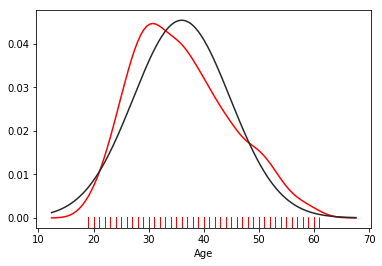

In [7]:
from scipy.stats import norm
sns.distplot(data['Age'],hist=False, color='r', rug=True, fit=norm)

#### It can be concluded that the variable 'Age' has a normal distribution of data.

#### Let's plot a two-dimensional density plot to determine the interdependence of two variables. Let's see how the user's age and the time spent on the site are linked.

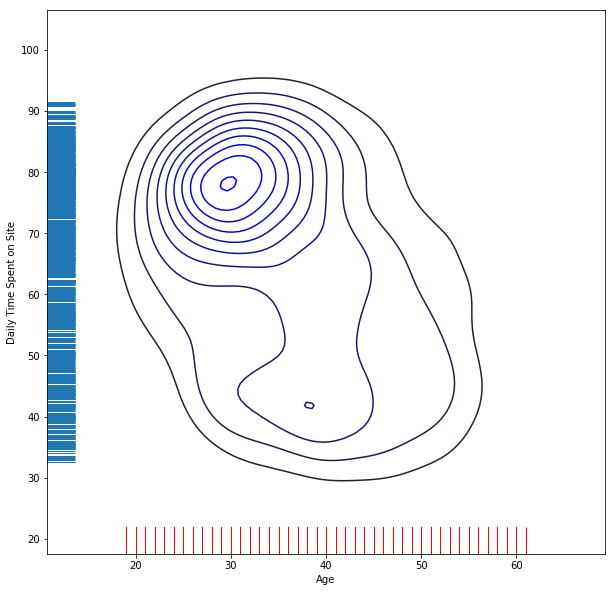

In [8]:
f, ax = plt.subplots(figsize=(10, 10))  
sns.kdeplot(data.Age, data['Daily Time Spent on Site'], color="b", ax=ax) 
sns.rugplot(data.Age, color="r", ax=ax)  
sns.rugplot(data['Daily Time Spent on Site'], vertical=True, ax=ax)  

#### From the picture, we can conclude that younger users spend more time on the site. This implies that users of the age between 20 and 40 years can be the main target group for the marketing campaign. Hypothetically, if we have a product intended for middle-aged people, this is the right site for advertising. Conversely, if we have a product intended for people over the age of 60, it would be a mistake to advertise on this site.

We will present another density graphic and determine the interdependency of 'Daily Time Spent on Site' and 'Daily Internet Usage'.

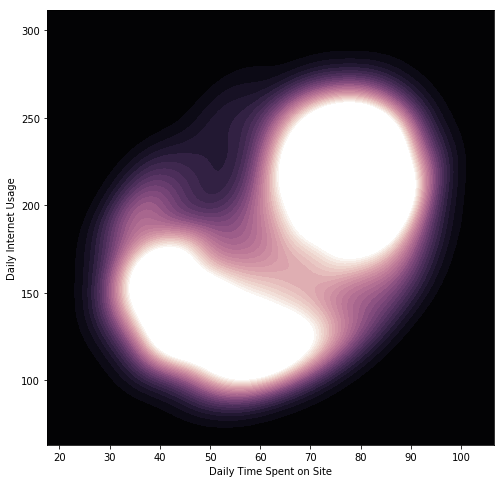

In [9]:
f, ax = plt.subplots(figsize=(8, 8))  
cmap = sns.cubehelix_palette(as_cmap=True, start=0, dark=0, light=3, reverse=True)  
sns.kdeplot(data["Daily Time Spent on Site"], data['Daily Internet Usage'],  
    cmap=cmap, n_levels=100, shade=True);

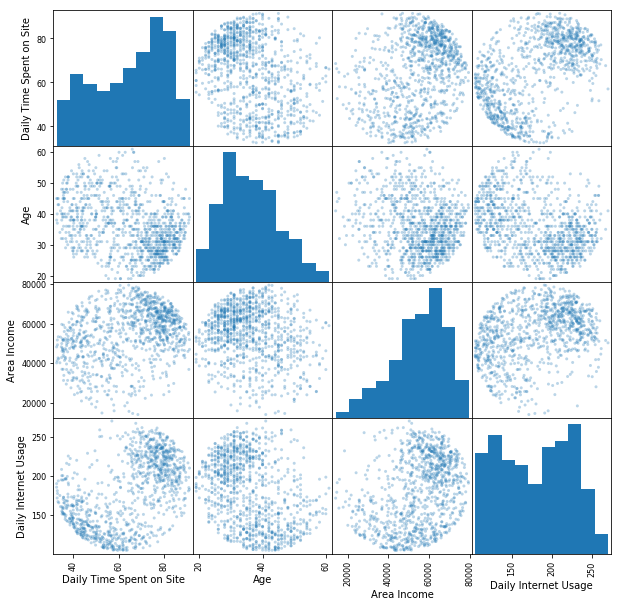

In [10]:
from pandas.plotting import scatter_matrix  
scatter_matrix(data[['Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage']],  
 alpha=0.3, figsize=(10,10));


### Data Preprocessing

In [11]:
object_variables = ['Ad Topic Line', 'City', 'Country']  
data[object_variables].describe(include=['O'])  

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Advanced disintermediate data-warehouse,Lisamouth,France
freq,1,3,9


As we can see from the table above that all the values in column "Ad Topic Line" is unique, while the "City" column contains 969 unique values out of 1000. There are too many unique elements within these two categorical columns and it is generally difficult to perform a prediction without the existence of a data pattern. Because of that, they will be omitted from further analysis. The third categorical variable, i.e "Country", has a unique element (France) that repeats 9 times. Additionally, we can determine countries with the highest number of visitors:

In [12]:
pd.crosstab(index=data['Country'], columns='count').sort_values(['count'], ascending=False).head(20) 

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


#### We have already seen, there are 237 different unique countries in our dataset and no single country is too dominant. A large number of unique elements will not allow a machine learning model to establish easily valuable relationships. For that reason, this variable will be excluded too.

In [13]:
data = data.drop(['Ad Topic Line', 'City', 'Country'], axis=1)  

In [14]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['Month'] = data['Timestamp'].dt.month
data['Day of month'] = data['Timestamp'].dt.day
data['Day of week'] = data['Timestamp'].dt.dayofweek
data['Hour'] = data['Timestamp'].dt.hour  
data = data.drop(['Timestamp'], axis=1)

data.head()  

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of month,Day of week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


### Train and Test Data

Once the dataset is processed, we need to divide it into two parts: training and test set. We will import and use the train_test_split function for that. All variables except 'Clicked on Ad' will be the input values X for the ML models. The variable 'Clicked on Ad' will be stored in y, and will represent the prediction variable. We arbitrarily chose to allocate 33% of the total data for the training set.

In [15]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'Month',
       'Day of month', 'Day of week', 'Hour'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split

X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',  
    'Male', 'Month', 'Day of month' ,'Day of week']]
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Model Development and Fitting Procedures
The Logistic Regression model is an algorithm that uses a logistic function to model binary dependent variables. It is a tool for predictive analysis and it is used to explain the relationships between multiple variables. 

The Decision Tree is one of the most commonly used data mining techniques for analysis and modeling. It is used for classification, prediction, estimation, clustering, data description, and visualization. The advantages of Decision Trees, compared to other data mining techniques are simplicity and computation efficiency. 

The first model we will import will be a Logistic Regression model. First, it is necessary to load the LogisticRegression function from the sklearn.linear_model library. Also, we will load the accuracy_score to evaluate the classification performances of the model.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

The next steps are the initialization of the model, it's training, and finally, making predictions.

In [18]:
model1 = LogisticRegression(solver='lbfgs')
model1.fit(X_train, y_train)
predictions_LR = model1.predict(X_test)

print('\nLogistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('\nConfusion Matrix:')
print(confusion_matrix(predictions_LR, y_test))



Logistic regression accuracy: 0.906060606060606

Confusion Matrix:
[[158  27]
 [  4 141]]


Our confusion matrix tells us that the total number of accurate predictions is 158 + 141 = 299. On the other hand, the number of incorrect predictions is 27 + 4 = 31. We can be satisfied with the prediction accuracy of our model.

In [19]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
predictions_DT = model2.predict(X_test)

print('\nLogistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('\nConfusion Matrix:')
print(confusion_matrix(predictions_LR, y_test))


Logistic regression accuracy: 0.906060606060606

Confusion Matrix:
[[158  27]
 [  4 141]]


It can be concluded that the Decision Tree model showed better performances in comparison to the Logistic Regression model. The confusion matrix shows us that the 308 predictions have been done correctly and that there are only 22 incorrect predictions. Additionally, Decision Tree accuracy is better by about 3% in comparison to the first regression model.